In [59]:
?.index

Object `.index` not found.


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


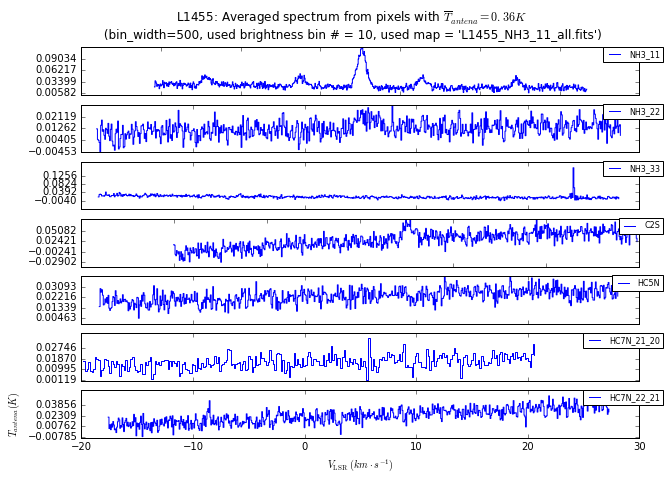

NH3_11 NH3_22 NH3_33 C2S  HC5N HC7N_21_20 HC7N_22_21
------ ------ ------ ---- ---- ---------- ----------
   0.0    1.0    2.0  3.0  4.0        5.0        6.0
   7.0    8.0    9.0 10.0 11.0       12.0       13.0
  14.0   15.0   16.0 17.0 18.0       19.0       20.0
  21.0   22.0   23.0 24.0 25.0       26.0       27.0
  28.0   29.0   30.0 31.0 32.0       33.0       34.0
  35.0   36.0   37.0 38.0 39.0       40.0       41.0
  42.0   43.0   44.0 45.0 46.0       47.0       48.0
  49.0   50.0   51.0 52.0 53.0       54.0       55.0
  56.0   57.0   58.0 59.0 60.0       61.0       62.0
  63.0   64.0   65.0 66.0 67.0       68.0       69.0
row: [1.3, -3.56, 27.24, 6.72, 12.53, -0.31, -153.84]
row: [1.92, 0.46, 1.69, 2.8, 1.13, 0.37, 1.38]
row: [1.54, 0.62, 1.58, 2.5, 0.88, 0.9, 1.13]
row: [1.37, 0.81, 1.65, 2.32, 1.13, 0.87, 1.34]
row: [1.25, 0.82, 1.45, 1.83, 1.22, 0.73, 1.18]
row: [1.15, 0.74, 1.7, 1.7, 1.16, 0.75, 1.15]
row: [1.26, 0.7, 1.64, 1.41, 1.18, 0.84, 1.08]
row: [1.23, 0.66, 1.2, 0.73,

map,bin width,bin#,NH3_11,NH3_22,NH3_33,C2S,HC5N,HC7N_21_20,HC7N_22_21
str10,str10,str10,float64,float64,float64,float64,float64,float64,float64
L1455_NH3_,500,0,1.3,-3.56,27.24,6.72,12.53,-0.31,-153.84
L1455_NH3_,500,1,1.92,0.46,1.69,2.8,1.13,0.37,1.38
L1455_NH3_,500,2,1.54,0.62,1.58,2.5,0.88,0.9,1.13
L1455_NH3_,500,3,1.37,0.81,1.65,2.32,1.13,0.87,1.34
L1455_NH3_,500,4,1.25,0.82,1.45,1.83,1.22,0.73,1.18
L1455_NH3_,500,5,1.15,0.74,1.7,1.7,1.16,0.75,1.15
L1455_NH3_,500,6,1.26,0.7,1.64,1.41,1.18,0.84,1.08
L1455_NH3_,500,7,1.23,0.66,1.2,0.73,1.16,0.78,1.13
L1455_NH3_,500,8,1.19,0.61,1.0,0.78,1.36,0.72,1.05


In [72]:
# What are the variables we want set as default?
# Taking out the user input leaves much less comparison options? what do we want to compare actually?
# Now bin_width=500, wanted_bin=0 occure as kew words in main() and in binning() function. Is this OK?
# Do we want to have global variable declarations in the header?


import GAS
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import astropy.units as u
from astropy.io import fits
from astropy.table import Table, hstack, vstack
%pylab
%matplotlib inline

vlsr = fits.getdata('L1455_eVlsr_v1.fits')
files =['L1455_NH3_11_all.fits', 'L1455_NH3_22_all.fits', 'L1455_NH3_33_all.fits',
       'L1455_C2S_all.fits', 'L1455_HC5N_all.fits', 'L1455_HC7N_21_20_all.fits',
       'L1455_HC7N_22_21_all.fits']
bin_width = 500
thisbin = 10
map_name = 'L1455_NH3_11_all.fits'
table_row = [[files[1][0:5], map_name, thisbin, bin_width]]
table_names = ['region', 'map', 'bin#', 'bin width']


def main(thisbin, bin_width):   
    # This is the main routine.
    loop_count = 0
    fig = plt.figure(figsize=(10,7))
    # for plotting plots in a single figure put plt.figure before all the .plot commands
    # otherwise you will get the plots in a different figures
    
    ax1 = plt.subplot(len(files), 1, 1)
    y, x, med = binning(map_name, bin_width, thisbin)
    # This takes in a 2D map and returns a 2D map where the image values are the bin to which a pixel belongs.
    
    for file_name in files:            
        sp_av, cube = averaging(file_name, y, x)
        thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
        #Change to velocity axis and such here as well.  Then average all spectra with that bin label.
        ax = fig.add_subplot(len(files),1,loop_count+1)
        plt.plot(offset_velocity,thiscube_spectrum_dv, drawstyle='steps')
        plt.yticks(np.arange(min(thiscube_spectrum_dv), max(thiscube_spectrum_dv), (max(thiscube_spectrum_dv)-min(thiscube_spectrum_dv))/4))     
    
        
        if file_name != files[-1]:
            plt.setp(ax.get_xticklabels(), visible=False)

#         file_name.strip([0:7]).strip([-1:-4])
        file_name = file_name.strip('L1455_').strip('_all.fits')
        plt.legend([file_name], bbox_to_anchor=(1.05, 1.1), prop={'size':8})
        
        loop_count += 1        

#     plt.legend(leg, loc = 5, prop={'size':8})
#     ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
#     fig.legend(curves_names, leg, bbox_to_anchor=(0.5, -0.15))
#     figtext(.1,.0,'averaging over brightness, with doppler v correction, thisbin=2' , fontsize=8)
#     fig.suptitle("averaging over brightness with brightnes bin = %r for bin width = %r" %(thisbin, bin_width), fontsize=12)
    fig.suptitle("L1455: Averaged spectrum from pixels with $\overline{T}_{antena} = %rK$ \n (bin_width=%r, used brightness bin # = %r, used map = %r)"
                 %(med, bin_width, thisbin, map_name), fontsize=12)
    plt.ylabel(r'$T_{antena} (K)$')
    plt.xlabel(r'$V_{\mathrm{LSR}}\ (km \cdot s^{-1})$')
#     plt.savefig("L1455:BinsAveraging_NH3map_bin_width=%r_thisbin=%r.png" %(bin_width, thisbin))
    plt.show()
    t = make_table2(files, map_name, thisbin, bin_width, y, x)
#     table.write('filename.txt', format='latex') # - COOL!
#     t.write('filename.txt', format='ascii.fixed_width')
    return t
    
def binning(f_nam, bin_width, thisbin):
    """A function creating brightness bins of pixels, and eventualy a map, in the given spectral cube"""
    cube = SpectralCube.read(f_nam)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    Tmax = cube.apply_numpy_function(np.nanmax,axis=0) # array of the maximum values in the spectra of each pixel
    baddata = nd.morphology.binary_dilation(np.isnan(Tmax),np.ones((25,25)))
    Tmax[baddata]=0.0
    Tmax[np.isfinite(Tmax)]
    
    bin_arr = np.sort(Tmax[np.isfinite(Tmax)])
    bin_arr2 = bin_arr[:: - bin_width] # this creates an array of the bin margins, in which every bin has a width of "bin_width"  
    bins = np.digitize(Tmax,bin_arr2)
    y, x = np.where(bins==thisbin)
    med = round(np.median(Tmax[y,x]), 2)
    return y, x, med

def averaging(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    return sp_av, cube

def averaging_over_dopplervel(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    thiscube_spectrum_dv, offset_velocity = GAS.gasBinning.BinByMask(cube, CentroidMap = vlsr, x = x, y = y)
    return thiscube_spectrum_dv, cube, offset_velocity

def spectral_integral(offset_velocity, thiscube_spectrum_dv):
    tracking = []
    ind = np.abs(offset_velocity) <= 2
    sp_integral = np.nansum(thiscube_spectrum_dv[ind])
    return sp_integral

    
def make_table(files, map_name, thisbin, bin_width, y, x):
    table_row = [[files[1][0:5], map_name, thisbin, bin_width]]
    table_names = ['region', 'map', 'bin#', 'bin width']
    t = Table(rows=table_row, names=table_names, meta={'name': 'table'})
    for file_name in files:
        thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
        sp_integral = spectral_integral(offset_velocity, thiscube_spectrum_dv)
        sp_integral = round(sp_integral, 2)
        table_row[0].append(sp_integral)
        table_names.append('I ' + file_name[7:-9])
    return Table(rows=table_row, names=table_names, meta={'name': 'table'})

def make_table2(files, map_name, thisbin, bin_width, y, x):
    # approach: first loop - make all the columns, with names. First columns will contain all the same data,
    # last ones would be empty.
    # second loop - append all the rows with the data
    
    # Or, create an empty tables. Then create in a loop all the rows. At the end of the loop add the rows
    # to the table. Then just add region, map and bin_width
    # in the title
        
    table_names = [f.strip('L1455_').strip('_all.fits') for f in files]
    arr = np.arange(len(table_names)*thisbin).reshape(thisbin, len(table_names))    
    t1 = Table(arr, names=table_names, meta={'name': 'table'}, dtype=len(table_names)*['f8'])    
    for bin_num in range(thisbin):
        row = []
        for file_name in files:
            y, x, med = binning(file_name, bin_width, bin_num)
            thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
            sp_integral = spectral_integral(offset_velocity, thiscube_spectrum_dv)
            sp_integral = round(sp_integral, 2)
            row.append(sp_integral)
        print 'row:', row
        t1[bin_num] = row
        
    first_names = ['map', 'bin width', 'bin#']
    table_names = first_names
    arr = np.arange(len(table_names)*thisbin).reshape(thisbin, len(table_names))    
    t2 = Table(arr, names=table_names, meta={'name': 'table'}, dtype=len(table_names)*['S20'])
    t2['map'] = map_name
    t2['bin width'] = bin_width
    t2['bin#'] = range(thisbin)
    t2.add_columns(t1.columns.values())

    return t2
    

t = main(thisbin, bin_width)
t

In [15]:
table

region,map,bin#,bin width,I H3_11,I H3_22,I H3_33,I 2S,I C5N,I C7N_21_20,I C7N_22_21
str5,str21,int64,int64,float64,float64,float64,float64,float64,float64,float64
L1455,L1455_NH3_11_all.fits,16,500,1.27,0.67,1.06,0.59,1.57,0.99,1.07


In [38]:
table.write('bintable.fits')

region          map          bin# ... sp_int HC7N_21_20 sp_int HC7N_22_21
------ --------------------- ---- ... ----------------- -----------------
 L1455 L1455_NH3_11_all.fits   16 ...     5.18588200843     14.0379252783


In [4]:
def make_table2():
    # approach: first loop - make all the columns, with names. First columns will contain all the same data,
    # last ones would be empty.
    # second loop - append all the rows with the data
    
#     table_row = [[files[1][0:5], map_name, thisbin, bin_width]]
#     table_names = ['region', 'map', 'bin#', 'bin width']
#     t = Table(None, names=None, meta={'name': 'table'})
#     t.add_column('L1455', name='region')
    
    t = Table(None, names=(None), meta={'name': 'table'})
#     t2 = Table(np.arange(25).reshape(5, 5), names=('e', 'f', 'g', 'h', 'i'))
#     t.add_columns(t2.columns.values())
    return t

t = make_table2()
t    
# t.add_row([-8, -9, 10])



<Table length=0>
<No columns>

In [64]:
dtype=7*('f8')
dtype
first_names = ['region', 'map', 'bin#', 'bin width']
table_names = first_names
arr = np.arange(len(table_names)*thisbin).reshape(thisbin, len(table_names))    
t2 = Table(arr, names=table_names, meta={'name': 'table'}, dtype=('S1', 'S1', 'S1', 'S1'))
# t['b']='bla'
# for i in first_names:
#     t[i] = i
t2

region,map,bin#,bin width
str1,str1,str1,str1
0,1,2,3
4,5,6,7
8,9,1,1
1,1,1,1
1,1,1,1
2,2,2,2
2,2,2,2
2,2,3,3
3,3,3,3
